In [78]:
import pandas as pd
from pathlib import Path
import json
import csv
import ast
import numpy as np

from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [79]:
model_1_id = '393'
model_2_id = '274'
model_0_id = '516'

In [80]:
posts_annotated_heinrich = pd.read_csv('annotated_heinrich.csv')
posts_annotated_julian = pd.read_csv('annotated_posts.csv')
post_ids = posts_annotated_heinrich['id'].tolist()
post_ids


['022784a8-227d-5652-8dc8-70368237788b',
 '04aaa408-41bf-587e-a3c7-633f3b0cc85f',
 '054ebf6a-c1e1-5f7f-99ca-517289ec14aa',
 '06397aac-468b-54a5-a52f-df3841903b86',
 '07df28ee-b93c-5afd-a0ce-457dfc1d987b',
 '0874d59f-f46a-5baf-8706-733ebca83e96',
 '0aa06466-4c74-5f4b-9082-bf23bead651e',
 '0c979793-286f-5f36-aff8-7dc084a72f3a',
 '0d553dcf-2dea-503c-9158-309640d2146b',
 '0edb7e0f-1d6d-5bc5-ae70-37e3d7619afc',
 '0f006209-f6b5-5b0a-8dcd-c4cfe1a5db8e',
 '0f9f7643-5296-5491-af15-dd33ae1d62c0',
 '11ec76d3-c0e0-5d77-b9dd-e68cc87d90cf',
 '129adf3d-e41a-5383-a23e-3cba3b358193',
 '131fcf4a-f8cc-5228-93da-f483b8efa033',
 '1360a2fa-2233-5134-9a6d-f320dcf71c52',
 '15e72475-70c7-535b-994f-2968a12a253e',
 '195db16f-a74c-5a9c-b67f-435a0a693866',
 '198098f9-2f53-50a7-bfe1-f442a6609d1c',
 '1b2209b0-8216-5205-a9e8-7ee39c21e161',
 '1c5d5570-4c65-5675-a279-02572658e040',
 '1d4f743e-505f-58d1-babe-a18f5d4a41b4',
 '1d71782f-ae52-5308-9ef8-d2faf550d815',
 '1e1c4faa-1d23-579c-aa77-62903a4edf1f',
 '1f4f4ed7-cd20-

In [81]:
def load_posts(model_id, filename=None):
    posts = []

    file_paths = [str(file) for file in Path("/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-klueber/toxicity/").glob(model_id + "*.json")]

    for file in file_paths:
        with open(file, 'r') as f:
            for line in f:
                if line.strip():
                    post = json.loads(line)
                    for _, id in post.items():
                        if id in post_ids:
                            posts.append(post)
                        if len(posts) == len(post_ids):
                            break
    
    # headers = ['id', 'is_local', 'crawled_from_instance', 'instance', 'created_at', 'content', 'plaintext', 'language', 'toxicity', 'severe_toxicity', 'profanity', 'obscenity', 'threat', 'insult', 'identity_attack', 'sexually_explicit']
    # with open(filename, 'w', newline='', encoding='utf-8') as file:
    #     writer = csv.DictWriter(file, fieldnames=headers)
    #     writer.writeheader()
    #     writer.writerows(posts)

    return posts

In [7]:
posts_model_0 = load_posts(model_0_id)
posts_model_0

[{'id': '60efd6ae-b2ce-5030-8471-399b048ff93a',
  'content': '<p>This was absolutely epic. I’m so happy. Thank you <a href="https://mastodon.green/tags/Paris" class="mention hashtag" rel="nofollow noopener noreferrer" target="_blank">#<span>Paris</span></a> <a href="https://mastodon.green/tags/olympics" class="mention hashtag" rel="nofollow noopener noreferrer" target="_blank">#<span>olympics</span></a> <a href="https://mastodon.green/tags/paris2024" class="mention hashtag" rel="nofollow noopener noreferrer" target="_blank">#<span>paris2024</span></a></p>',
  'crawled_from_instance': 'med-mastodon.com',
  'instance': 'mastodon.green',
  'is_local': False,
  'created_at': '2024-07-26T21:31:52+00:00',
  'plaintext': 'This was absolutely epic. I’m so happy. Thank you #Paris #olympics #paris2024',
  'language': '__label__eng_Latn',
  'toxicity': 0.0005652566,
  'severe_toxicity': 0.0001352844,
  'obscenity': 0.0001844649,
  'threat': 0.0001456702,
  'insult': 0.0001753639,
  'identity_atta

In [8]:
posts_model_1 = load_posts(model_1_id)
posts_model_1

[{'id': '24604c31-4f38-509f-8267-b19b2c544c82',
  'content': '<p>Thanks for sharing your time <span class="h-card" translate="no"><a href="https://mastodon.social/@rsmon77" class="u-url mention" rel="nofollow noopener noreferrer" target="_blank">@<span>rsmon77</span></a></span> <span class="h-card" translate="no"><a href="https://mstdn.plus/@JoeWynne" class="u-url mention" rel="nofollow noopener noreferrer" target="_blank">@<span>JoeWynne</span></a></span> <span class="h-card" translate="no"><a href="https://mastodon.social/@analgesicsleep" class="u-url mention" rel="nofollow noopener noreferrer" target="_blank">@<span>analgesicsleep</span></a></span> Next week we have a musical episode featuring Billy Joel followed by maybe the greatest hour ever broadcast by a major network.....Take care. See ya soon. <a href="https://mastodon.social/tags/Catitstu" class="mention hashtag" rel="nofollow noopener noreferrer" target="_blank">#<span>Catitstu</span></a></p>',
  'crawled_from_instance': 'm

In [9]:
posts_model_2 = load_posts(model_2_id)
posts_model_2

[{'id': 'c0c6b484-5fee-5ef6-ac2b-72ce4047dd89',
  'content': '<p>Dear Cunts, our chat. No glow niggers\' with recipes or such things <br><a href="https://t.me/biancazombiechat" rel="nofollow noopener noreferrer" target="_blank">t.me/biancazombiechat</a></p>',
  'crawled_from_instance': 'fedibird.com',
  'instance': 'poa.st',
  'is_local': False,
  'created_at': '2024-07-26T21:25:17.388000+00:00',
  'plaintext': "Dear Cunts, our chat. No glow niggers' with recipes or such things t.me/biancazombiechat",
  'language': '__label__eng_Latn',
  'toxicity': 0.7570315,
  'severe_toxicity': 0.44787344,
  'profanity': 0.70864636,
  'threat': 0.049128212,
  'insult': 0.6308392,
  'identity_attack': 0.7028837,
  'sexually_explicit': 0.3935998},
 {'id': '06397aac-468b-54a5-a52f-df3841903b86',
  'content': '<p>I really hate Russian dolls, they’re so full of themselves.</p>',
  'crawled_from_instance': 'troet.cafe',
  'instance': 'mstdn.social',
  'is_local': False,
  'created_at': '2024-07-26T21:45:0

In [82]:
csv_filename = "posts_model_0.csv"
headers = ['id', 'is_local', 'crawled_from_instance', 'instance', 'created_at', 'content', 'plaintext', 'language', 'toxicity', 'severe_toxicity', 'profanity', 'obscenity', 'threat', 'insult', 'identity_attack', 'sexually_explicit']
with open(csv_filename, 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=headers)
    writer.writeheader()
    writer.writerows(posts_model_0)

In [83]:
csv_filename = "posts_model_1.csv"
headers = ['id', 'is_local', 'crawled_from_instance', 'instance', 'created_at', 'content', 'plaintext', 'language', 'toxicity', 'severe_toxicity', 'profanity', 'obscenity', 'threat', 'insult', 'identity_attack', 'sexually_explicit']
with open(csv_filename, 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=headers)
    writer.writeheader()
    writer.writerows(posts_model_1)

In [84]:
csv_filename = "posts_model_2.csv"
headers = ['id', 'is_local', 'crawled_from_instance', 'instance', 'created_at', 'content', 'plaintext', 'language', 'toxicity', 'severe_toxicity', 'profanity', 'obscenity', 'threat', 'insult', 'identity_attack', 'sexually_explicit']
with open(csv_filename, 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=headers)
    writer.writeheader()
    writer.writerows(posts_model_2)

In [85]:
df0_heinrich = pd.merge(posts_annotated_heinrich, pd.read_csv('posts_model_0.csv'), on=["id", "plaintext"], how="inner")
df1_heinrich = pd.merge(posts_annotated_heinrich, pd.read_csv('posts_model_1.csv'), on=["id", "plaintext"], how="inner")
df2_heinrich = pd.merge(posts_annotated_heinrich, pd.read_csv('posts_model_2.csv'), on=["id", "plaintext"], how="inner")

df0_julian = pd.merge(posts_annotated_julian, pd.read_csv('posts_model_0.csv'), on=["id", "plaintext"], how="inner")
df1_julian = pd.merge(posts_annotated_julian, pd.read_csv('posts_model_1.csv'), on=["id", "plaintext"], how="inner")
df2_julian = pd.merge(posts_annotated_julian, pd.read_csv('posts_model_2.csv'), on=["id", "plaintext"], how="inner")

In [86]:
df0_heinrich = df0_heinrich[['id', 'toxicity_x', 'plaintext', 'toxicity_y', 'severe_toxicity', 'obscenity', 'threat', 'insult', 'identity_attack', 'sexually_explicit']]
df0_heinrich.rename(columns={'toxicity_x': 'label', 'toxicity_y': 'toxic prob', 'severe_toxicity': 'severe toxic prob', 
                    'obscenity': 'obscene prob', 'threat': 'threat prob', 'insult': 'insult prob', 
                    'identity_attack': 'identity attack prob', 'sexually_explicit': 'sexually explicit prob'}, 
                    inplace=True)
df1_heinrich = df1_heinrich[['id', 'toxicity_x', 'plaintext', 'toxicity_y', 'severe_toxicity', 'obscenity', 'threat', 'insult', 'identity_attack', 'sexually_explicit']]
df1_heinrich.rename(columns={'toxicity_x': 'label', 'toxicity_y': 'toxic prob', 'severe_toxicity': 'severe toxic prob', 
                    'obscenity': 'obscene prob', 'threat': 'threat prob', 'insult': 'insult prob', 
                    'identity_attack': 'identity attack prob', 'sexually_explicit': 'sexually explicit prob'}, 
                    inplace=True)
df2_heinrich = df2_heinrich[['id', 'toxicity_x', 'plaintext', 'toxicity_y', 'severe_toxicity', 'profanity', 'threat', 'insult', 'identity_attack', 'sexually_explicit']]
df2_heinrich.rename(columns={'toxicity_x': 'label', 'toxicity_y': 'toxic prob', 'severe_toxicity': 'severe toxic prob', 
                    'profanity': 'obscene prob', 'threat': 'threat prob', 'insult': 'insult prob', 
                    'identity_attack': 'identity attack prob', 'sexually_explicit': 'sexually explicit prob'}, 
                    inplace=True)

df0_julian = df0_julian[['id', 'toxicity_x', 'plaintext', 'toxicity_y', 'severe_toxicity', 'obscenity', 'threat', 'insult', 'identity_attack', 'sexually_explicit']]
df0_julian.rename(columns={'toxicity_x': 'label', 'toxicity_y': 'toxic prob', 'severe_toxicity': 'severe toxic prob', 
                    'obscenity': 'obscene prob', 'threat': 'threat prob', 'insult': 'insult prob', 
                    'identity_attack': 'identity attack prob', 'sexually_explicit': 'sexually explicit prob'}, 
                    inplace=True)
df1_julian = df1_julian[['id', 'toxicity_x', 'plaintext', 'toxicity_y', 'severe_toxicity', 'obscenity', 'threat', 'insult', 'identity_attack', 'sexually_explicit']]
df1_julian.rename(columns={'toxicity_x': 'label', 'toxicity_y': 'toxic prob', 'severe_toxicity': 'severe toxic prob', 
                    'obscenity': 'obscene prob', 'threat': 'threat prob', 'insult': 'insult prob', 
                    'identity_attack': 'identity attack prob', 'sexually_explicit': 'sexually explicit prob'}, 
                    inplace=True)
df2_julian = df2_julian[['id', 'toxicity_x', 'plaintext', 'toxicity_y', 'severe_toxicity', 'profanity', 'threat', 'insult', 'identity_attack', 'sexually_explicit']]
df2_julian.rename(columns={'toxicity_x': 'label', 'toxicity_y': 'toxic prob', 'severe_toxicity': 'severe toxic prob', 
                    'profanity': 'obscene prob', 'threat': 'threat prob', 'insult': 'insult prob', 
                    'identity_attack': 'identity attack prob', 'sexually_explicit': 'sexually explicit prob'}, 
                    inplace=True)

In [87]:
df1_julian

id  \
0    022784a8-227d-5652-8dc8-70368237788b   
1    04aaa408-41bf-587e-a3c7-633f3b0cc85f   
2    054ebf6a-c1e1-5f7f-99ca-517289ec14aa   
3    06397aac-468b-54a5-a52f-df3841903b86   
4    07df28ee-b93c-5afd-a0ce-457dfc1d987b   
..                                    ...   
248  faed67ae-1314-5824-ac13-54b0d8300acd   
249  fb9b599d-4d72-52fb-95cc-b55e0c523e87   
250  fd3bca4e-ff2f-5436-b7c7-0510160f6078   
251  fe3962dc-f420-5cf2-b25d-6551029f57fd   
252  ffcee3a8-3443-504c-8973-38fa1e3f77c4   

                                                 label  \
0    {"choices":["toxic","obscene","insult","identi...   
1             {"choices":["toxic","obscene","insult"]}   
2                                                  NaN   
3                       {"choices":["toxic","insult"]}   
4                                                  NaN   
..                                                 ...   
248                                                NaN   
249                                                NaN   
250                                                NaN   
251                                                NaN   
252                    {"choices":["toxic","obscene"]}   

                                             plaintext  toxic prob  \
0    What‘s #Vance gonna shove up his butt? A couch...    0.943871   
1    Today, Celine Dion kicks Stiff-Person Syndrome...    0.956634   
2    entire timeline is French people going "yay I ...    0.895740   
3    I really hate Russian dolls, they’re so full o...    0.878265   
4    One will protect you, the others will try to k...    0.527561   
..                                                 ...         ...   
248  @killick Too late. I think "Couch Fucker" has ...    0.278785   
249  I was just told that I don't accept compliment...    0.966099   
250                            There will be BloodShed    0.610707   
251  41 Must-Have #FOSS Software for 2024 tecmint.c...    0.001315   
252  I'm so fucking happy that EVERYONE will die, s...    0.976107   

     severe toxic prob  obscene prob  threat prob  insult prob  \
0             0.000557      0.331814     0.010702     0.226723   
1             0.001023      0.890403     0.008042     0.185067   
2             0.000120      0.859067     0.002544     0.247389   
3             0.000082      0.000827     0.007018     0.506460   
4             0.000079      0.001023     0.537219     0.004633   
..                 ...           ...          ...          ...   
248           0.000044      0.120630     0.005651     0.095906   
249           0.000219      0.952744     0.001752     0.667923   
250           0.000106      0.002120     0.615847     0.004884   
251           0.000002      0.000187     0.000083     0.000387   
252           0.000464      0.666400     0.155428     0.763709   

     identity attack prob  sexually explicit prob  
0                0.002378                0.858212  
1                0.003049                0.834974  
2                0.015579                0.004452  
3                0.725044                0.000355  
4                0.001532                0.000695  
..                    ...                     ...  
248              0.000604                0.005720  
249              0.003839                0.008092  
250              0.001769                0.000944  
251              0.000036                0.000053  
252              0.001594                0.004603  

[253 rows x 10 columns]

In [88]:
categories = [
    'toxic', 
    'severe toxic', 
    'obscene', 
    'threat', 
    'insult', 
    'identity attack', 
    'sexually explicit'
]

In [89]:
def map_labels(df, categories):
    result_df = df.copy()
    
    for category in categories:
        result_df[category] = 0

    def get_choices(label_str):
        if pd.isna(label_str):
            return []
        if label_str.startswith("{"):  # Check if it's a JSON-like string
            try:
                label_dict = ast.literal_eval(label_str)
                return label_dict.get("choices", [])
            except:
                return []
        else:  # It's a single label, not JSON
            return [label_str]

    for idx, row in result_df.iterrows():
        choices = get_choices(row["label"])
        for category in categories:
            if category in choices:
                result_df.at[idx, category] = 1

    return result_df



In [90]:
df0_heinrich = map_labels(df0_heinrich, categories).fillna(0.0)
df1_heinrich = map_labels(df1_heinrich, categories).fillna(0.0)
df2_heinrich= map_labels(df2_heinrich, categories).fillna(0.0)

df0_julian = map_labels(df0_julian, categories).fillna(0.0)
df1_julian = map_labels(df1_julian, categories).fillna(0.0)
df2_julian = map_labels(df2_julian, categories).fillna(0.0)

In [91]:
def compare_dataframes(df1, df2, columns):
    differences = {}
    for col in columns:
        if col in df1.columns and col in df2.columns:
            diff = df1[col] != df2[col]
            differences[col] = df1[diff][[col]].merge(df2[diff][[col]], left_index=True, right_index=True, suffixes=('_df1', '_df2'))
    
    return differences

columns_to_compare = ['toxic', 'severe toxic', 'obscene', 'threat', 'insult', 'identity attack', 'sexually explicit']
differences = compare_dataframes(df1_heinrich, df1_julian, columns_to_compare)

# Ergebnisse anzeigen
for col, diff_df in differences.items():
    print(f"Unterschiede in Spalte: {col}")
    print(diff_df, "\n")


Unterschiede in Spalte: toxic
Empty DataFrame
Columns: [toxic_df1, toxic_df2]
Index: [] 

Unterschiede in Spalte: severe toxic
Empty DataFrame
Columns: [severe toxic_df1, severe toxic_df2]
Index: [] 

Unterschiede in Spalte: obscene
   obscene_df1  obscene_df2
6            1            0 

Unterschiede in Spalte: threat
Empty DataFrame
Columns: [threat_df1, threat_df2]
Index: [] 

Unterschiede in Spalte: insult
Empty DataFrame
Columns: [insult_df1, insult_df2]
Index: [] 

Unterschiede in Spalte: identity attack
Empty DataFrame
Columns: [identity attack_df1, identity attack_df2]
Index: [] 

Unterschiede in Spalte: sexually explicit
    sexually explicit_df1  sexually explicit_df2
25                      1                      0 



In [93]:
from sklearn.metrics import cohen_kappa_score

def calculate_cohens_kappa(df1, df2, columns):
    kappa_scores = {}
    
    for col in columns:
        # Ensure the column exists in both DataFrames
        if col not in df1.columns or col not in df2.columns:
            print(f"Warning: Column {col} not found in one or both DataFrames")
            kappa_scores[col] = None
            continue
        
        # Extract the column data
        series1 = df1[col]
        series2 = df2[col]
        
        # Ensure same index for comparison
        common_index = series1.index.intersection(series2.index)
        series1 = series1.loc[common_index]
        series2 = series2.loc[common_index]
        
        # Calculate Cohen's Kappa
        try:
            kappa = cohen_kappa_score(series1, series2)
            kappa_scores[col] = kappa
        except Exception as e:
            print(f"Error calculating Kappa for {col}: {e}")
            kappa_scores[col] = None
    
    return kappa_scores

columns_to_compare = ['toxic', 'severe toxic', 'obscene', 'threat', 'insult', 'identity attack', 'sexually explicit']
kappa_results = calculate_cohens_kappa(df1_heinrich, df1_julian, columns_to_compare)

for col, kappa in kappa_results.items():
    print(f"{col}: Cohen's Kappa = {kappa:.4f}")

toxic: Cohen's Kappa = 1.0000
severe toxic: Cohen's Kappa = 1.0000
obscene: Cohen's Kappa = 0.9907
threat: Cohen's Kappa = 1.0000
insult: Cohen's Kappa = 1.0000
identity attack: Cohen's Kappa = 1.0000
sexually explicit: Cohen's Kappa = 0.9735


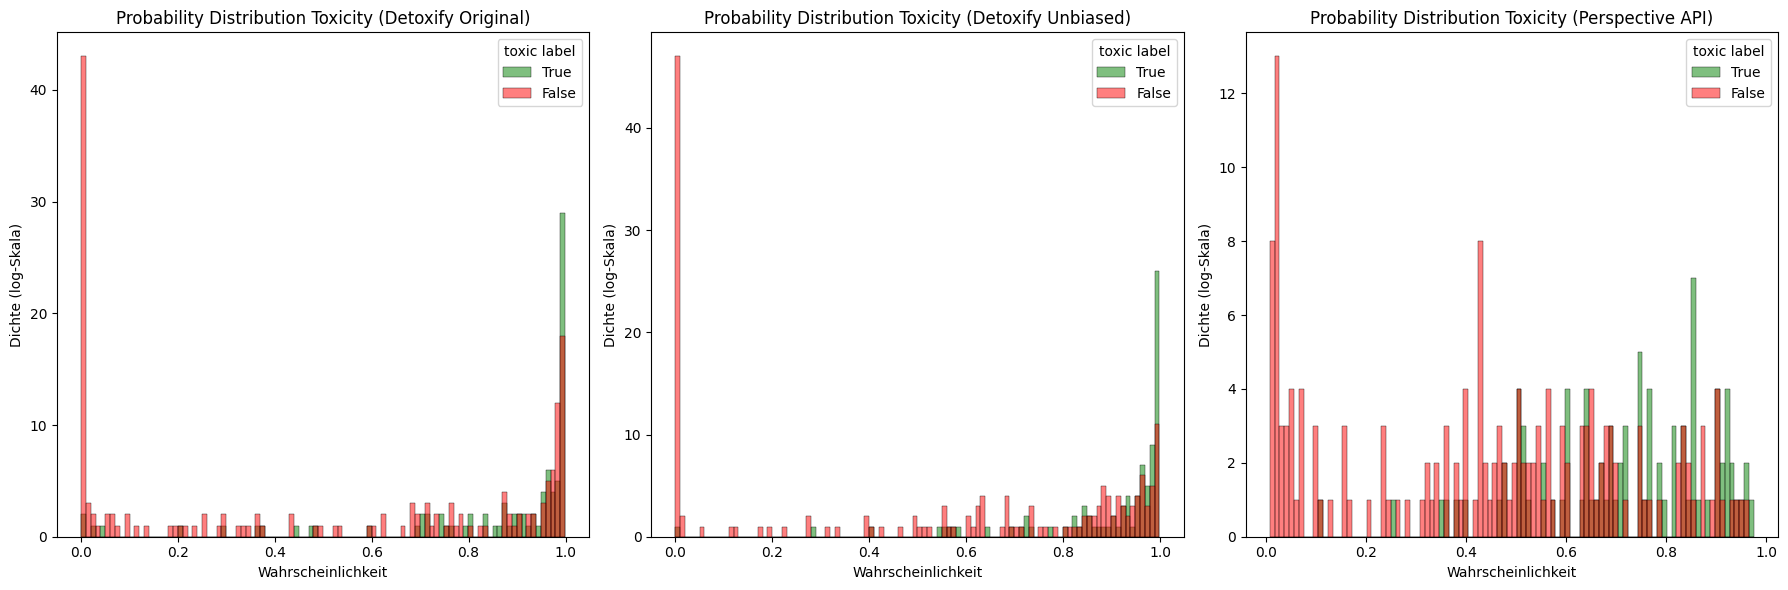

In [95]:
plt.figure(figsize=(18, 6))

models = ['Detoxify Original', 'Detoxify Unbiased', 'Perspective API']

for idx, df in enumerate([df0_heinrich, df1_heinrich, df2_heinrich]):
    plt.subplot(1, 3, idx + 1)
    
    color_map = df[category].map({0: "red", 1: "green"})

    sns.histplot(df, x=f'toxic prob', bins=100, hue=df['toxic'], palette={0: "red", 1: "green"}, legend=False)
    plt.legend(title=f'toxic label', labels=['True','False'])
    plt.title(f"Probability Distribution Toxicity ({models[idx]})")
    plt.xlabel("Wahrscheinlichkeit")
    plt.ylabel("Dichte (log-Skala)")
    #plt.yscale("log") 

plt.tight_layout()
plt.show()

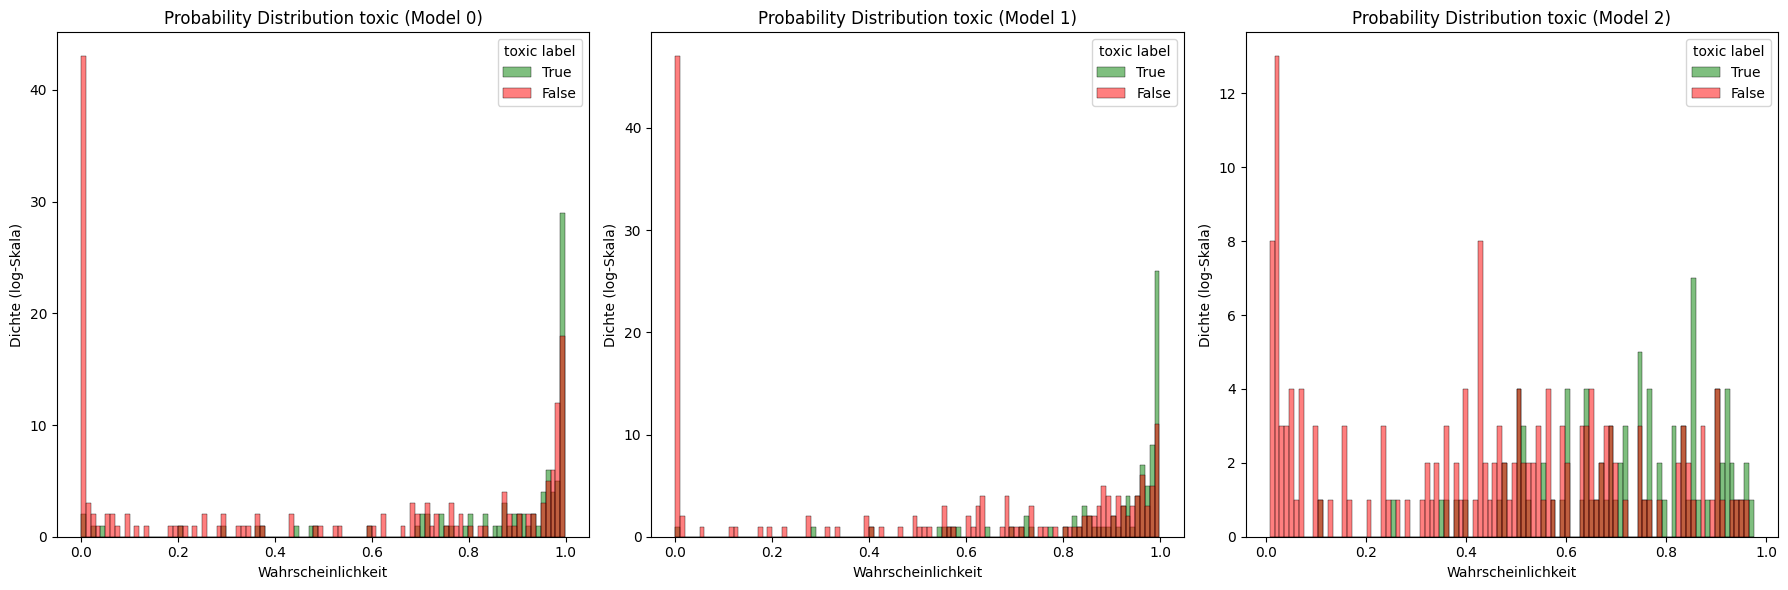

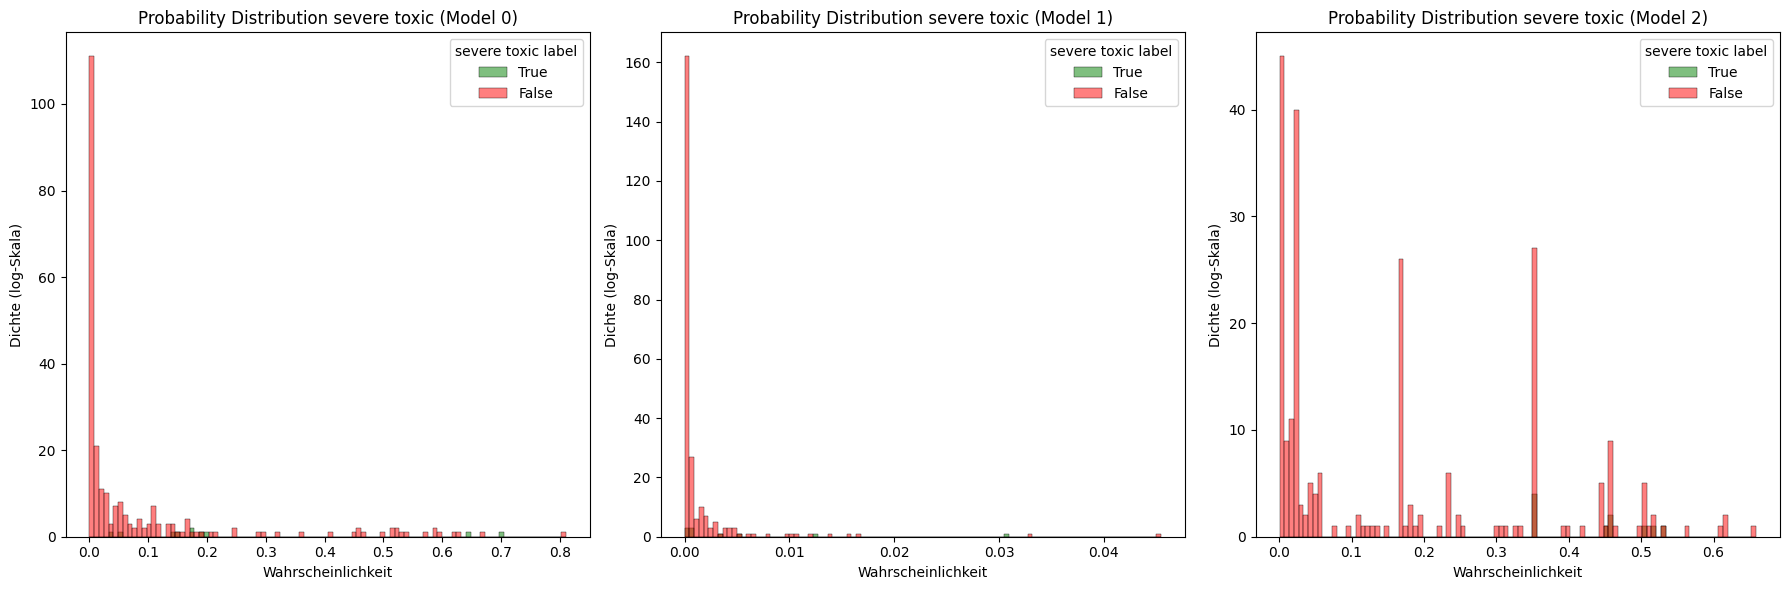

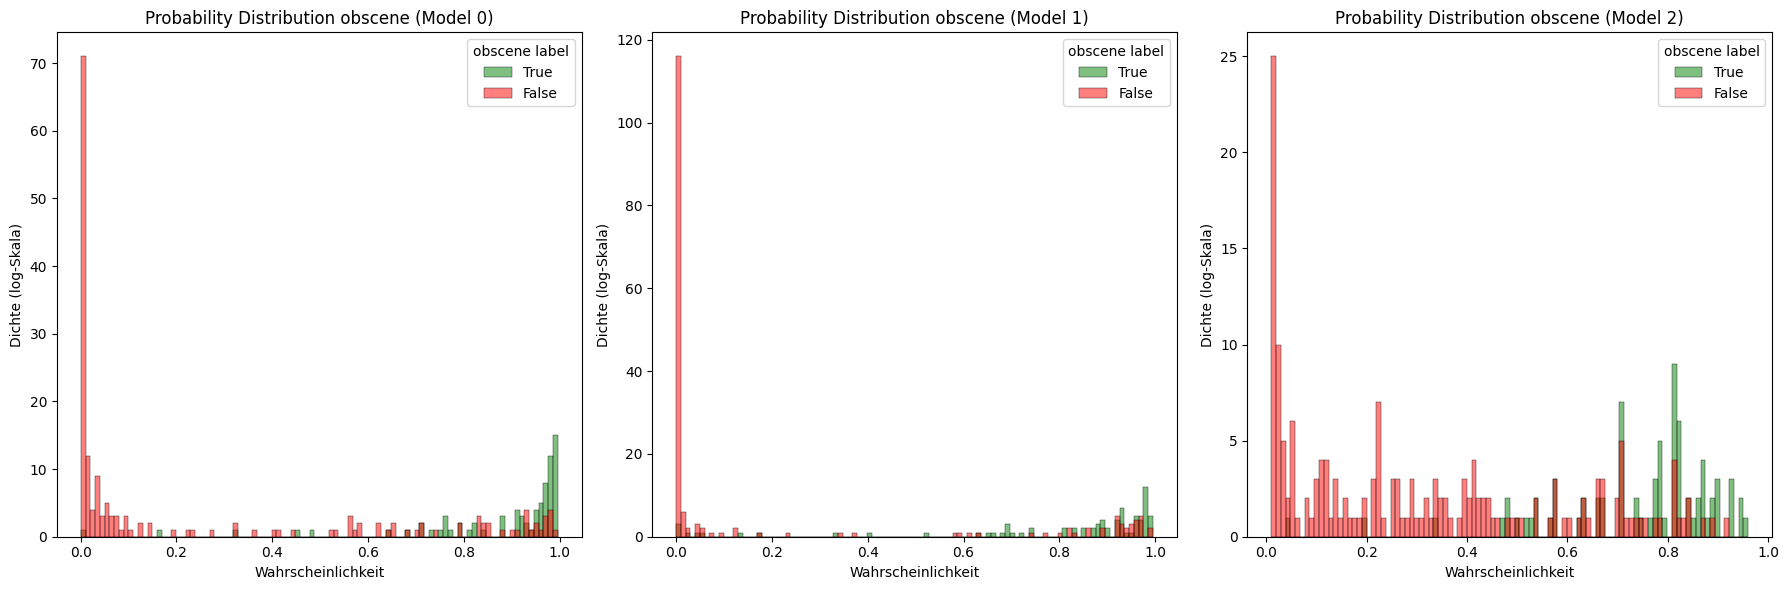

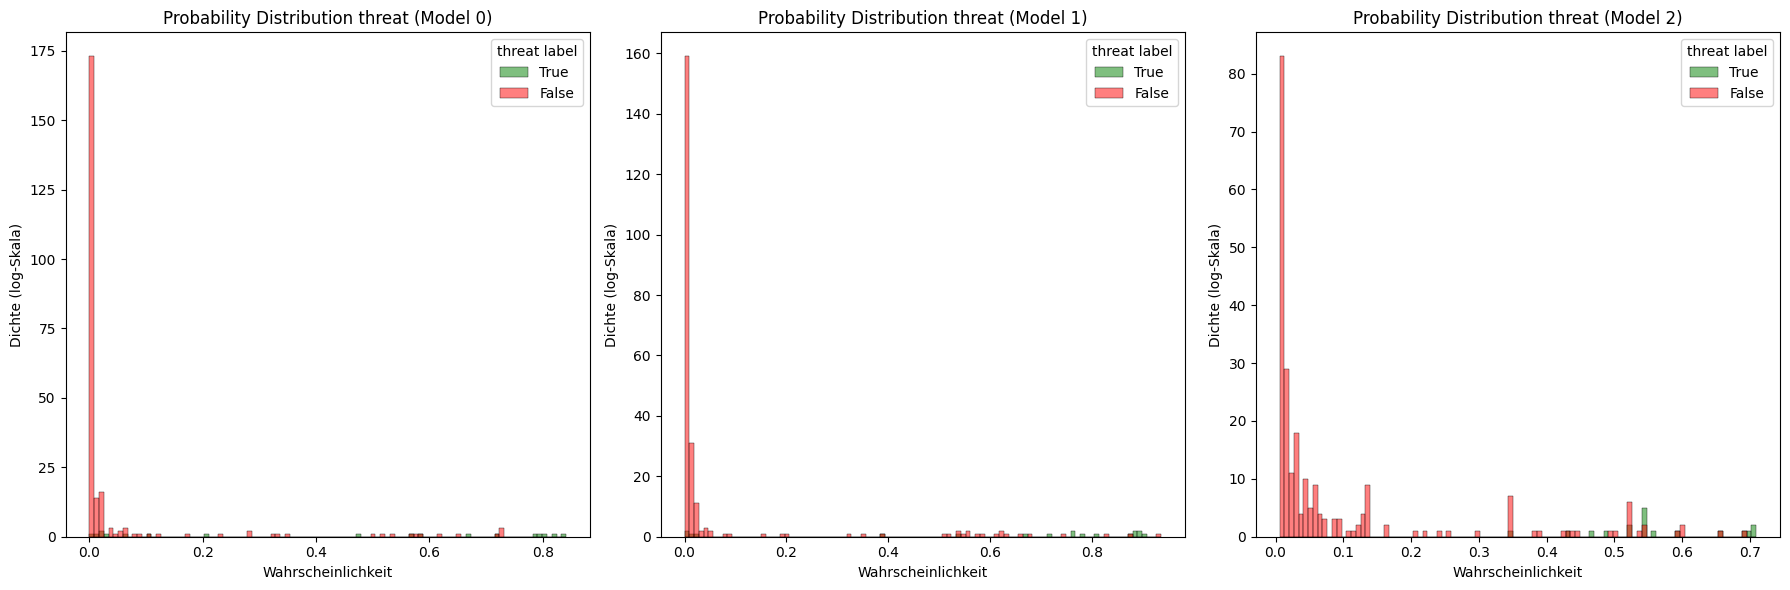

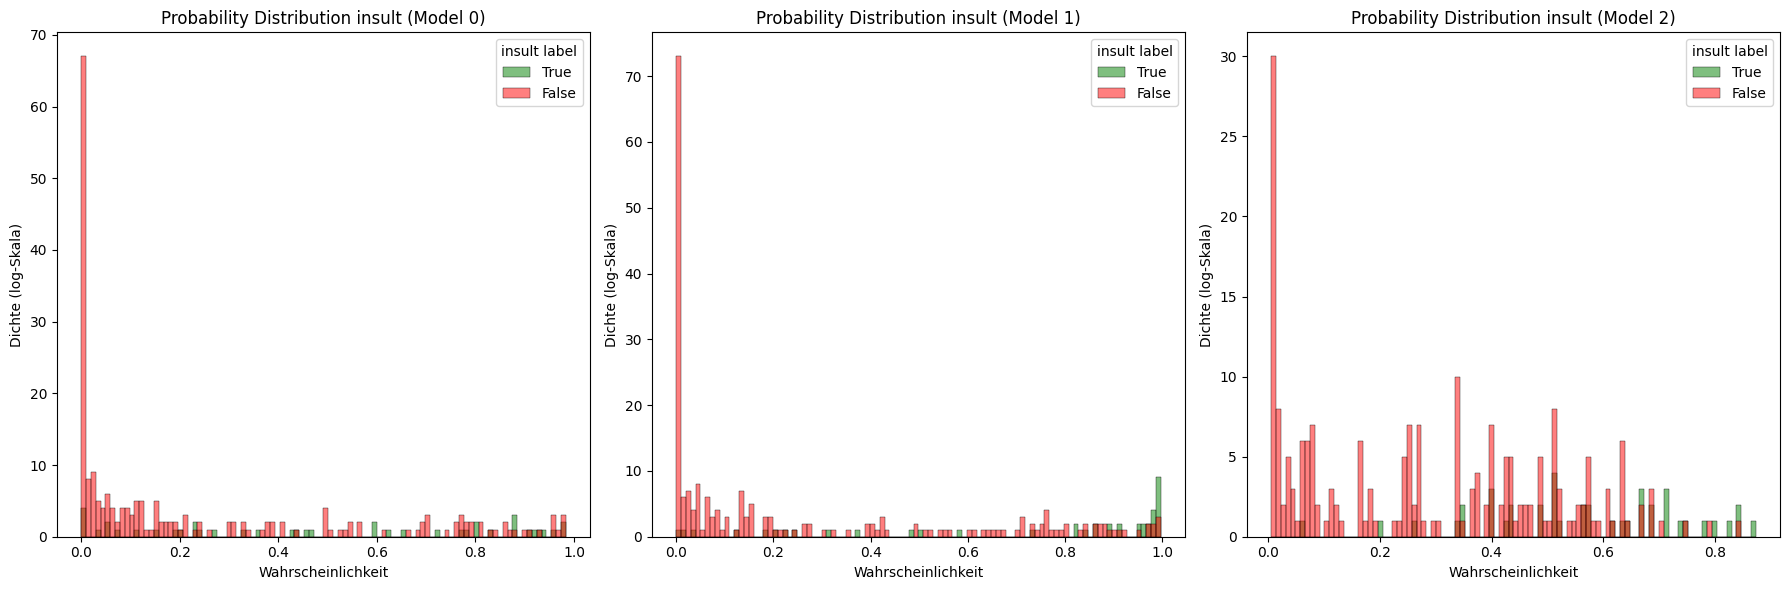

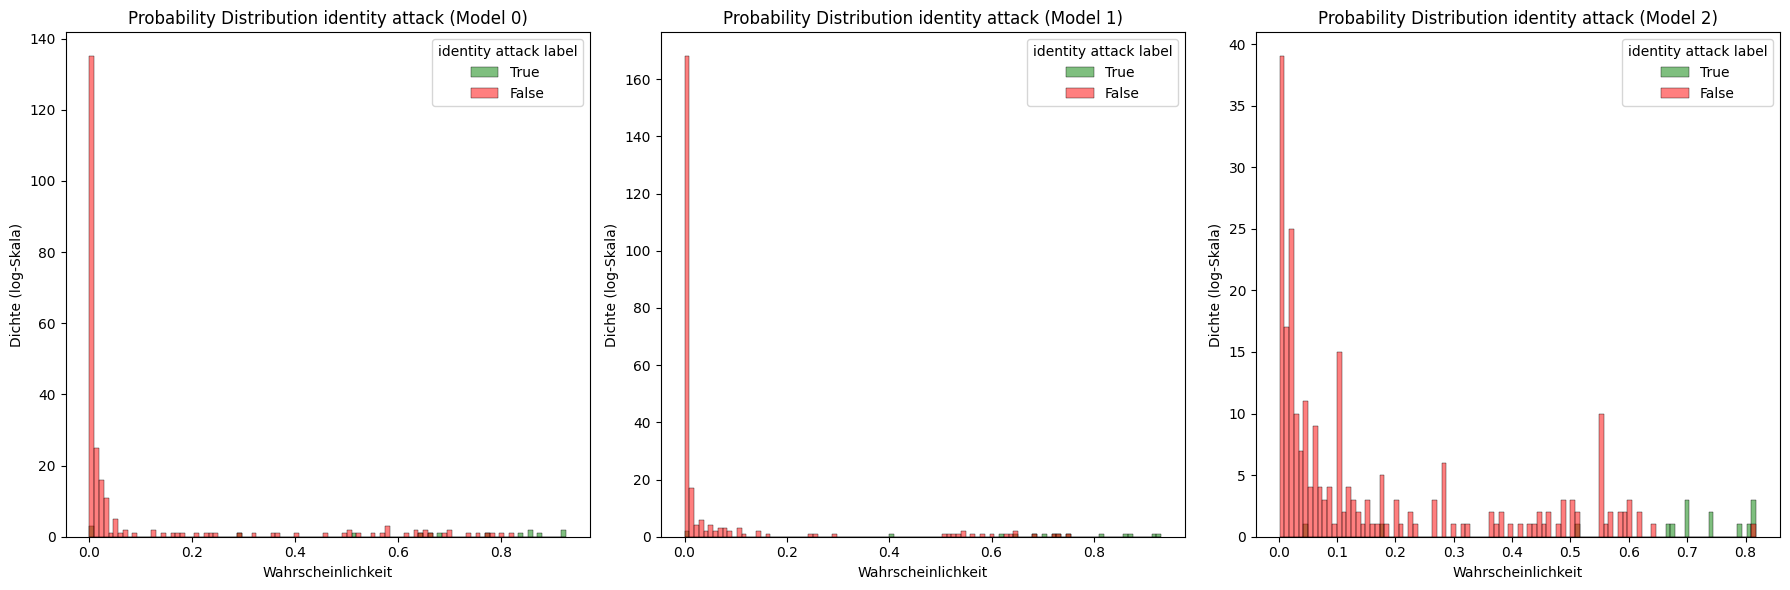

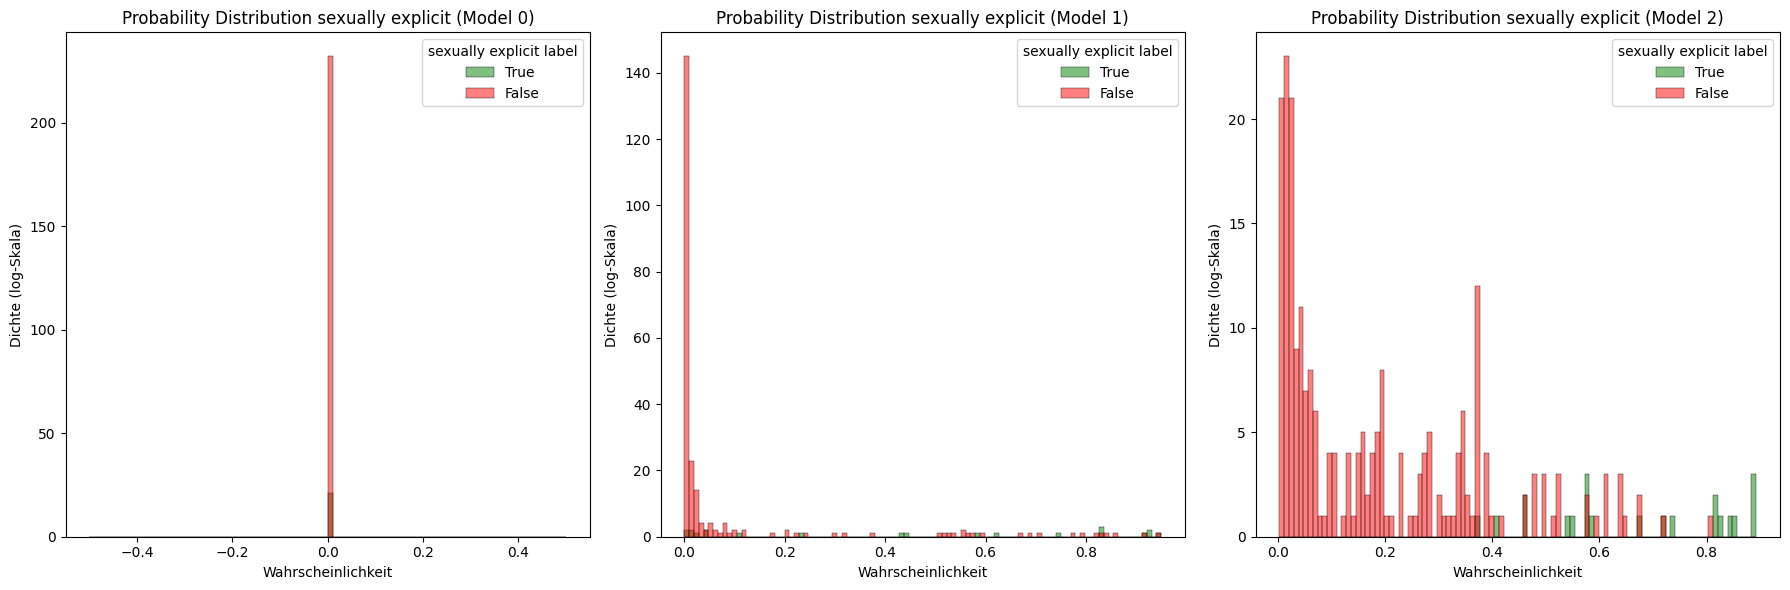

In [74]:
for category in categories:
    plt.figure(figsize=(18, 6))
    
    for idx, df in enumerate([df0_heinrich, df1_heinrich, df2_heinrich]):
        plt.subplot(1, 3, idx + 1)
        
        # color_map = df[category].map({0: "red", 1: "green"})

        sns.histplot(df, x=f'{category} prob', bins=100, hue=df[category], legend=False) #, palette={0: "red", 1: "green"}, legend=False)
        plt.legend(title=f'{category} label', labels=['True','False'])
        plt.title(f"Probability Distribution {category} (Model {idx})")
        plt.xlabel("Wahrscheinlichkeit")
        plt.ylabel("Dichte (log-Skala)")
        #plt.yscale("log") 

    plt.tight_layout()
    plt.show()



In [75]:
def compare_models(model_dfs, model_names, categories, prob_suffix='prob', pred_suffix='pred', true_label_suffix=''):
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    
    # Create subplots for ROC curves
    n_rows = (len(categories) + 1) // 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
    axes = axes.flatten()
    
    # Initialize results storage
    all_metrics = []
    auc_scores = {model_name: {} for model_name in model_names}
    optimal_thresholds = {model_name: {} for model_name in model_names}
    
    # Compare each category
    for idx, category in enumerate(categories):
        ax = axes[idx]
        
        # Plot ROC curve for each model
        for model_idx, (df, model_name) in enumerate(zip(model_dfs, model_names)):
            prob_col = f'{category} {prob_suffix}'
            true_col = f'{category}{true_label_suffix}'
            pred_col = f'{category} {pred_suffix}'
            
            if prob_col not in df.columns or true_col not in df.columns:
                continue
            
            # Calculate ROC curve and AUC
            fpr, tpr, thresholds = roc_curve(df[true_col], df[prob_col].fillna(0.0))
            roc_auc = auc(fpr, tpr)
            auc_scores[model_name][category] = roc_auc
            
            optimal_idx = np.argmax(tpr - fpr)
            optimal_thresholds[model_name][category] = thresholds[optimal_idx]
        
            predictions = (df[prob_col] >= optimal_thresholds[model_name][category]).astype(int)
            df[pred_col] = predictions

            # Plot ROC curve
            ax.plot(fpr, tpr, color=colors[model_idx], 
                   label=f'{model_name} (AUC = {roc_auc:.3f})')
            
            all_metrics.append({
                'Model': model_name,
                'Category': category,
                'AUC-ROC': roc_auc,
                'F1': f1_score(df[true_col], predictions),
                'Precision': precision_score(df[true_col], predictions),
                'Recall': recall_score(df[true_col], predictions),
                'Support': len(df[df[true_col] == 1]),
                'Class Balance': len(df[df[true_col] == 1]) / len(df)
            })
        
        # Customize plot
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curves - {category}')
        ax.legend(loc="lower right")
        ax.grid(True)
    
    # Remove any unused subplots
    for idx in range(len(categories), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()
    
    # Create summary DataFrame
    metrics_df = pd.DataFrame(all_metrics)
    
    # Create summary plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    # Plot AUC-ROC comparison
    metrics_pivot = metrics_df.pivot(index='Category', columns='Model', values='AUC-ROC')
    metrics_pivot.plot(kind='bar', ax=axes[0])
    axes[0].set_title('AUC-ROC Comparison')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
    
    # Plot F1 comparison
    metrics_pivot = metrics_df.pivot(index='Category', columns='Model', values='F1')
    metrics_pivot.plot(kind='bar', ax=axes[1])
    axes[1].set_title('F1 Score Comparison')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
    
    # Plot Precision comparison
    metrics_pivot = metrics_df.pivot(index='Category', columns='Model', values='Precision')
    metrics_pivot.plot(kind='bar', ax=axes[2])
    axes[2].set_title('Precision Comparison')
    axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
    
    # Plot Recall comparison
    metrics_pivot = metrics_df.pivot(index='Category', columns='Model', values='Recall')
    metrics_pivot.plot(kind='bar', ax=axes[3])
    axes[3].set_title('Recall Comparison')
    axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    return metrics_df, auc_scores, optimal_thresholds

/home/julian/info/Uni/thesis/toxic-bert/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


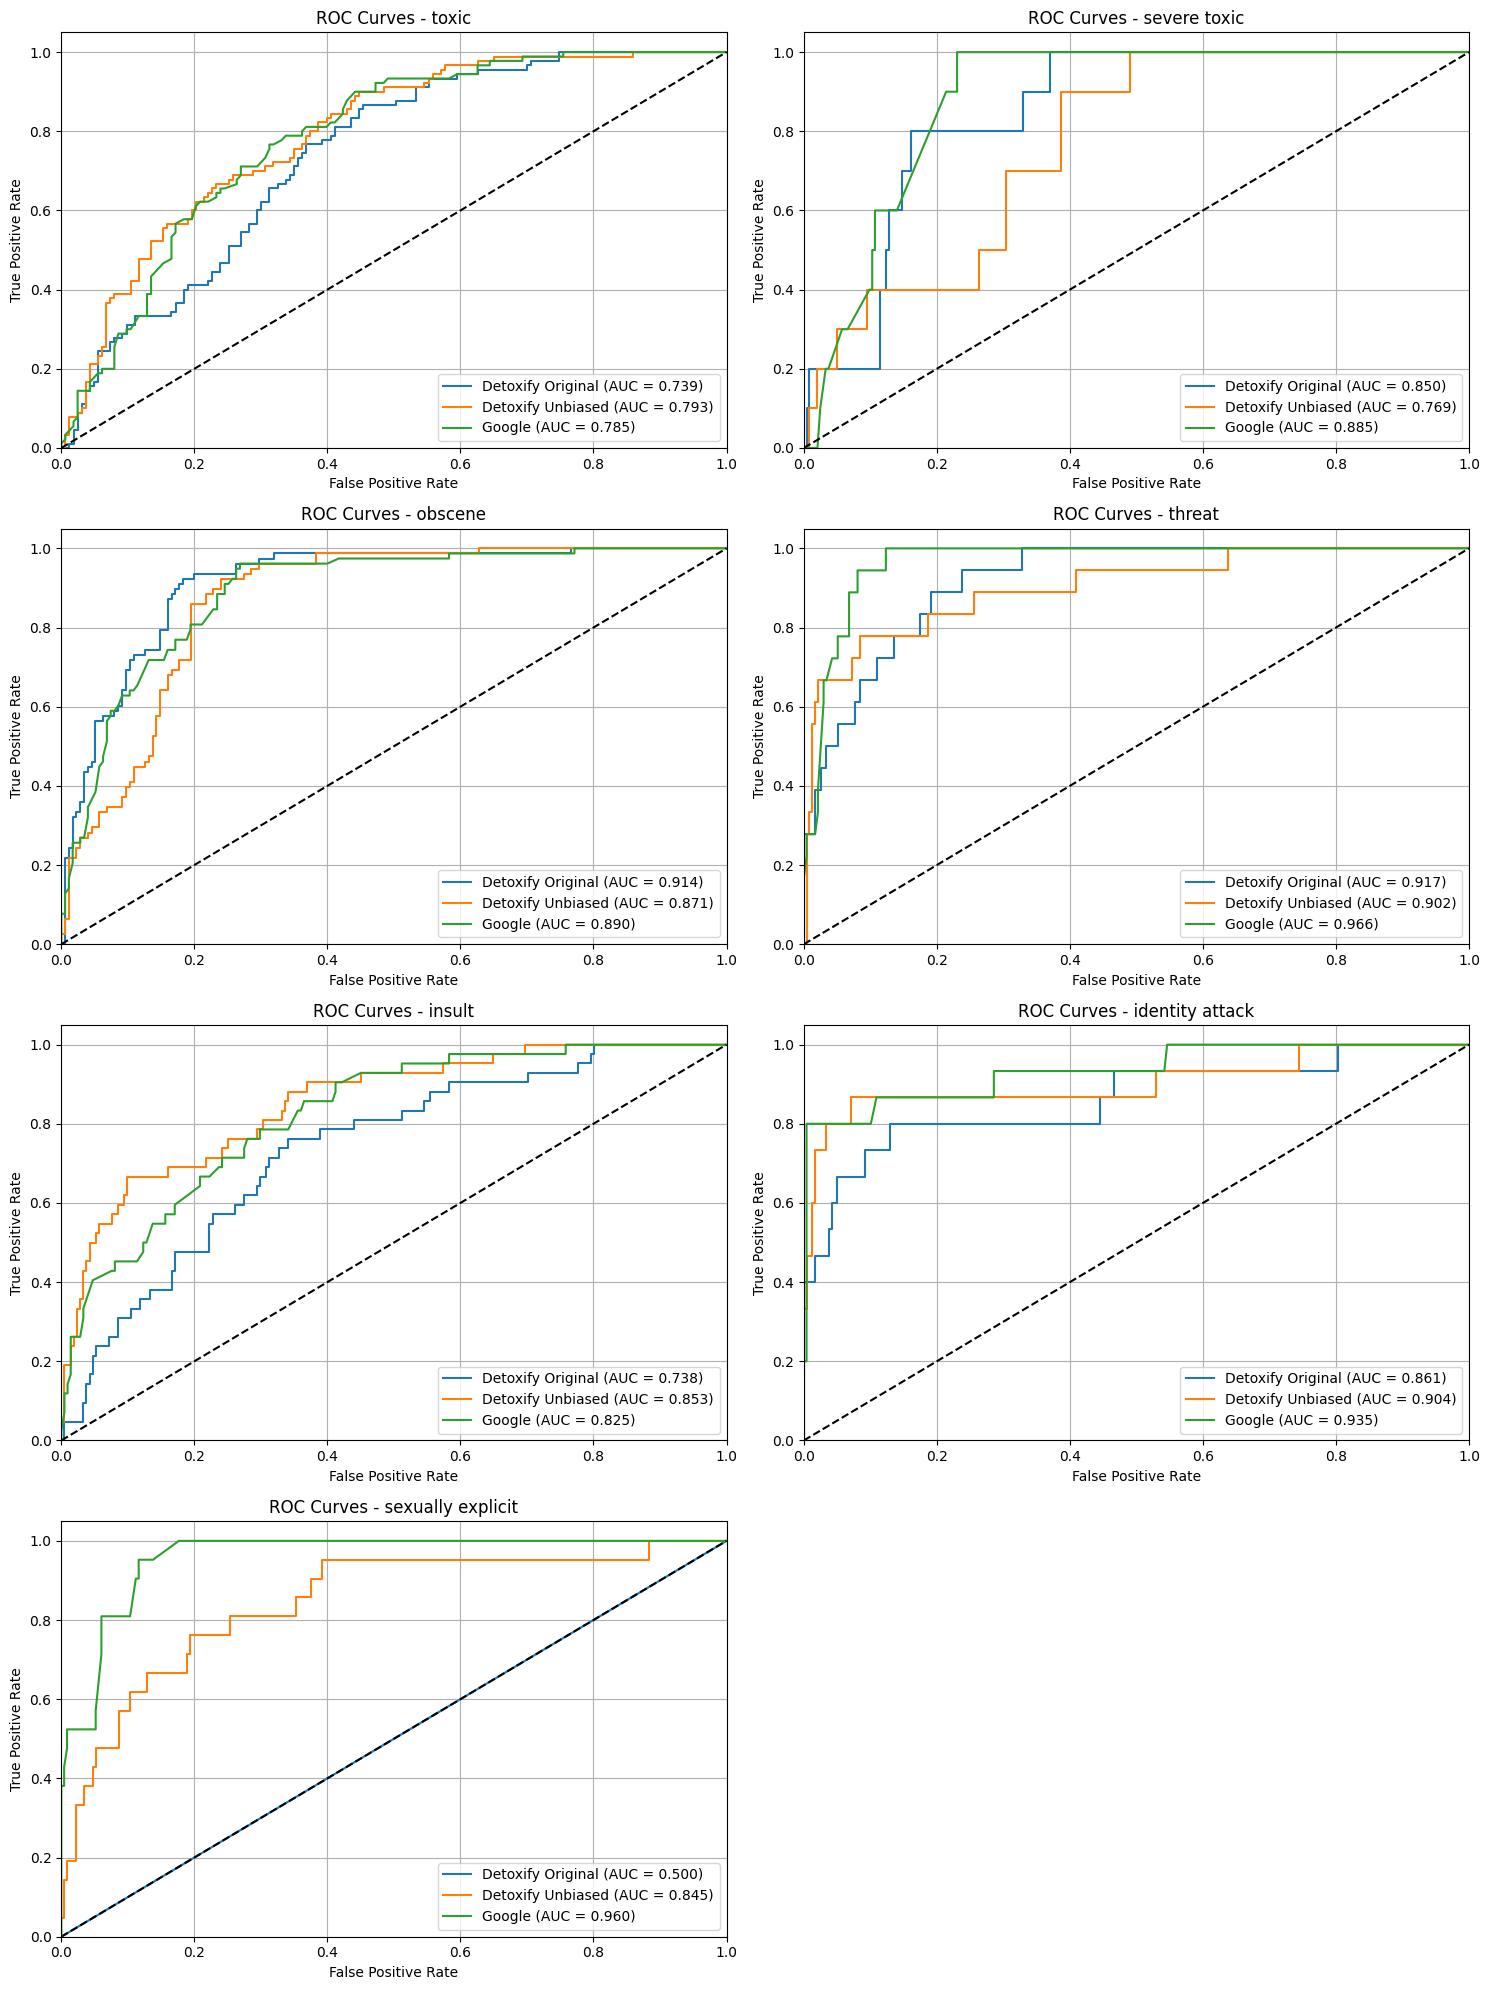

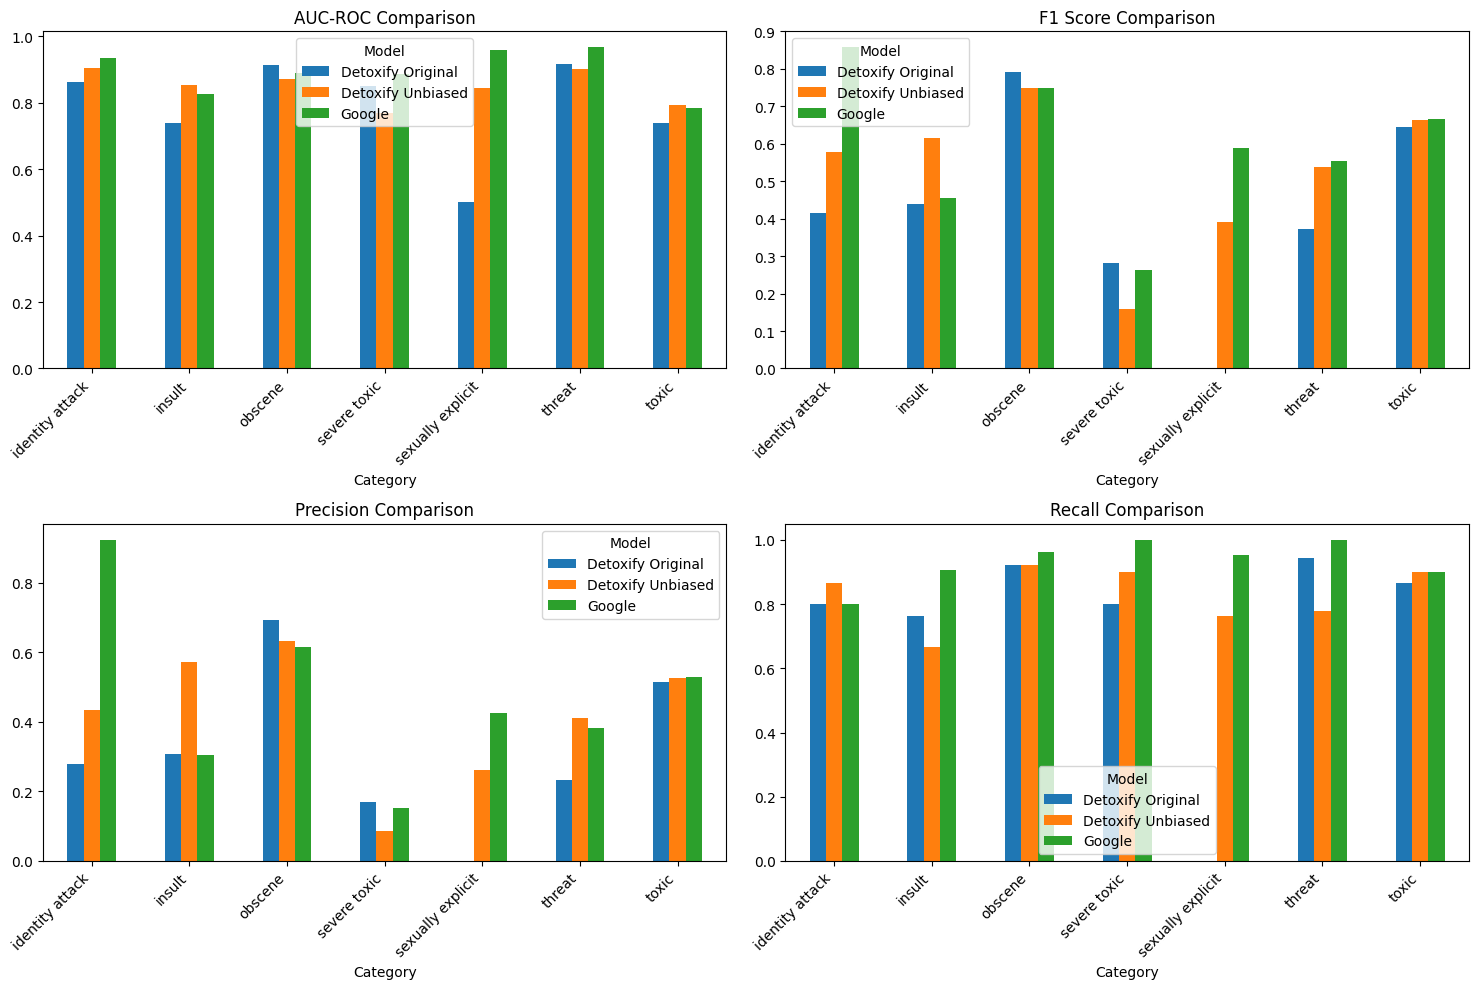

{'Detoxify Original': {'toxic': 0.6957550049, 'severe toxic': 0.1401396394, 'obscene': 0.6862637997, 'threat': 0.0118094021, 'insult': 0.1870194376, 'identity attack': 0.2936536074, 'sexually explicit': inf}, 'Detoxify Unbiased': {'toxic': 0.6986723542, 'severe toxic': 0.0002886144, 'obscene': 0.138682127, 'threat': 0.3876763582, 'insult': 0.8201203942, 'identity attack': 0.4090955555, 'sexually explicit': 0.0391638093}, 'Google': {'toxic': 0.50789946, 'severe toxic': 0.35004315, 'obscene': 0.4681068, 'threat': 0.34552678, 'insult': 0.344702, 'identity attack': 0.6682205, 'sexually explicit': 0.40438387}}

Detailed Performance Metrics:
                Model           Category  AUC-ROC     F1  Precision  Recall  \
0   Detoxify Original              toxic    0.739  0.645      0.513   0.867   
1   Detoxify Unbiased              toxic    0.793  0.664      0.526   0.900   
2              Google              toxic    0.785  0.667      0.529   0.900   
3   Detoxify Original       severe toxic

In [77]:
model_dfs = [df0_heinrich, df1_heinrich, df2_heinrich]
model_names = ['Detoxify Original', 'Detoxify Unbiased', 'Google']

metrics_df, auc_scores, optimal_thresholds = compare_models(model_dfs, model_names, categories)
print(optimal_thresholds)

print("\nDetailed Performance Metrics:")
print(metrics_df.round(3))

print("\nAverage Performance Across Categories:")
print(metrics_df.groupby('Model')[['AUC-ROC', 'F1', 'Precision', 'Recall']].mean().round(3))

In [97]:
from sklearn.metrics import f1_score, precision_score, recall_score

def compare_models_f1_at_threshold(model_dfs, model_names, categories, prob_suffix='prob', true_label_suffix=''):
    
    # Initialize results storage
    all_metrics = []
    
    # Compare each category
    for category in categories:
        
        # Calculate F1 score for each model
        for df, model_name in zip(model_dfs, model_names):
            prob_col = f'{category} {prob_suffix}'
            true_col = f'{category}{true_label_suffix}'
            
            if prob_col not in df.columns or true_col not in df.columns:
                continue
            
            # Use a fixed threshold of 0.5 for predictions
            predictions = (df[prob_col] >= 0.5).astype(int)
            
            # Calculate metrics
            f1 = f1_score(df[true_col], predictions)
            precision = precision_score(df[true_col], predictions)
            recall = recall_score(df[true_col], predictions)
            
            all_metrics.append({
                'Model': model_name,
                'Category': category,
                'F1': f1,
                'Precision': precision,
                'Recall': recall,
                'Support': len(df[df[true_col] == 1]),
                'Class Balance': len(df[df[true_col] == 1]) / len(df)
            })
    
    # Create summary DataFrame
    metrics_df = pd.DataFrame(all_metrics)
    
    return metrics_df

In [98]:
model_dfs = [df0_heinrich, df1_heinrich, df2_heinrich]

metrics_df = compare_models_f1_at_threshold(model_dfs, models, categories)
print(optimal_thresholds)

print("\nDetailed Performance Metrics:")
print(metrics_df.round(3))

{'Detoxify Original': {'toxic': 0.6957550049, 'severe toxic': 0.1401396394, 'obscene': 0.6862637997, 'threat': 0.0118094021, 'insult': 0.1870194376, 'identity attack': 0.2936536074, 'sexually explicit': inf}, 'Detoxify Unbiased': {'toxic': 0.6986723542, 'severe toxic': 0.0002886144, 'obscene': 0.138682127, 'threat': 0.3876763582, 'insult': 0.8201203942, 'identity attack': 0.4090955555, 'sexually explicit': 0.0391638093}, 'Google': {'toxic': 0.50789946, 'severe toxic': 0.35004315, 'obscene': 0.4681068, 'threat': 0.34552678, 'insult': 0.344702, 'identity attack': 0.6682205, 'sexually explicit': 0.40438387}}

Detailed Performance Metrics:
                Model           Category     F1  Precision  Recall  Support  \
0   Detoxify Original              toxic  0.622      0.482   0.878       90   
1   Detoxify Unbiased              toxic  0.635      0.473   0.967       90   
2     Perspective API              toxic  0.664      0.526   0.900       90   
3   Detoxify Original       severe toxic

/home/julian/info/Uni/thesis/toxic-bert/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/julian/info/Uni/thesis/toxic-bert/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [177]:
def count(df, categories, suffix=''):

    list_count = []

    for col in categories:
        list_count.append(df[f'{col}{suffix}'].sum())
    
    return list_count

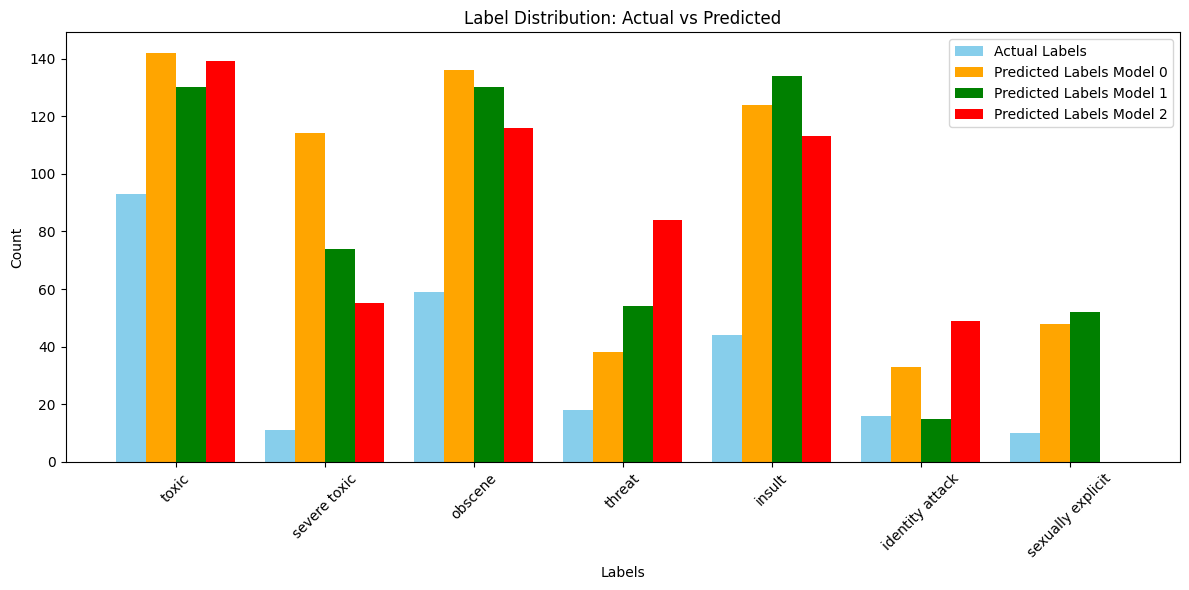

In [178]:
label_counts = count(df0, categories)
predicted_label_counts_0 = count(df0, categories, ' pred')
predicted_label_counts_1 = count(df1, categories, ' pred')
predicted_label_counts_2 = count(df2, categories, ' pred')

x = np.arange(len(categories)) 
width = 0.2  

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5 * width, label_counts, width=width, color='skyblue', label="Actual Labels")
plt.bar(x - 0.5 * width, predicted_label_counts_0, width=width, color='orange', label="Predicted Labels Model 0")
plt.bar(x + 0.5 * width, predicted_label_counts_1, width=width, color='green', label="Predicted Labels Model 1")
plt.bar(x + 1.5 * width, predicted_label_counts_2, width=width, color='red', label="Predicted Labels Model 2")


plt.xticks(ticks=x, labels=categories, rotation=45)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Label Distribution: Actual vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()

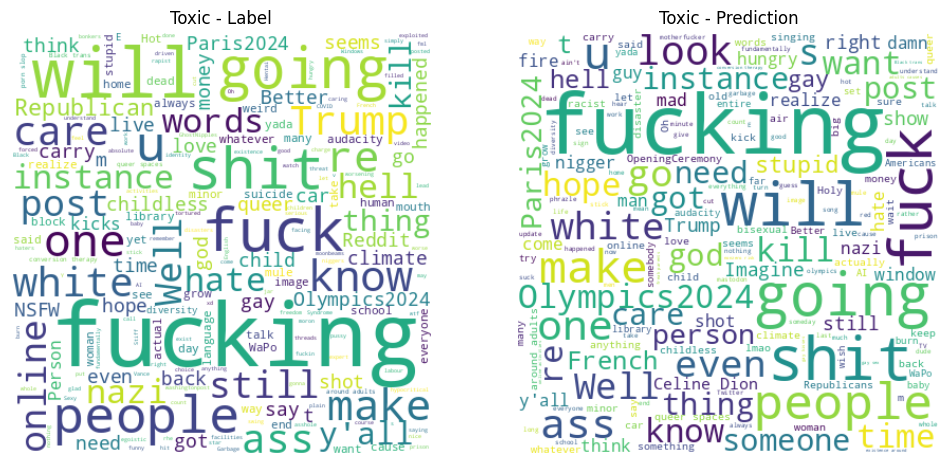

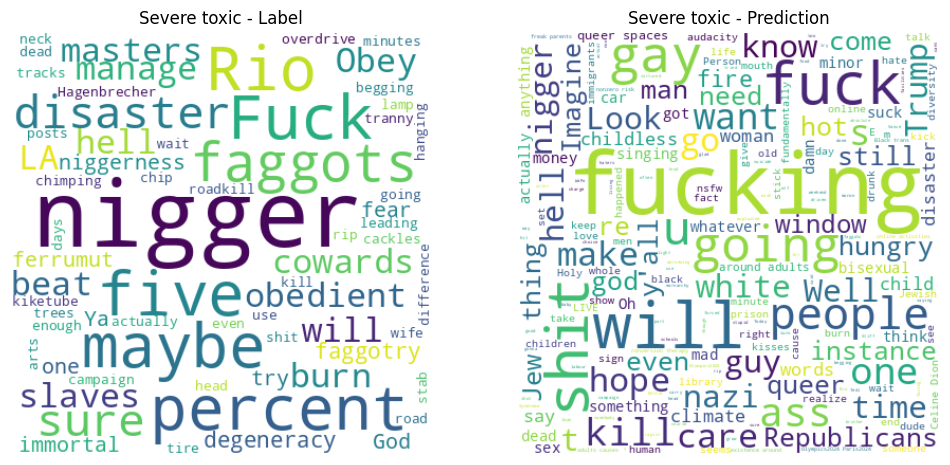

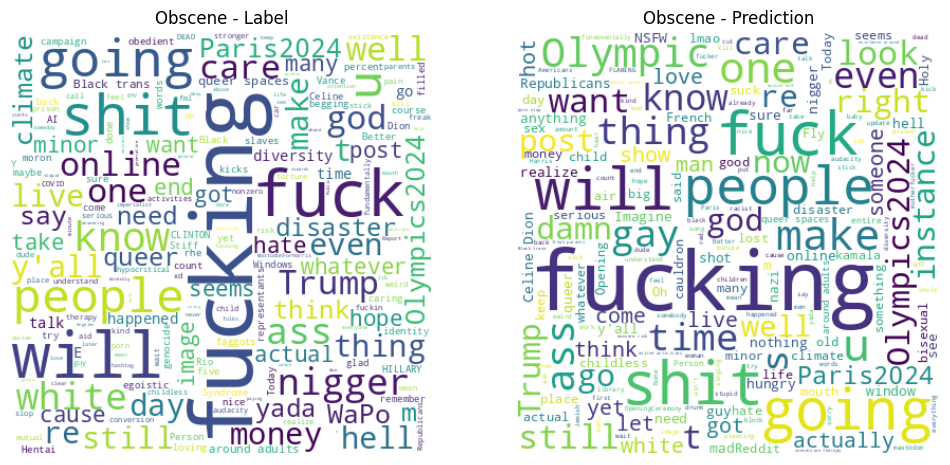

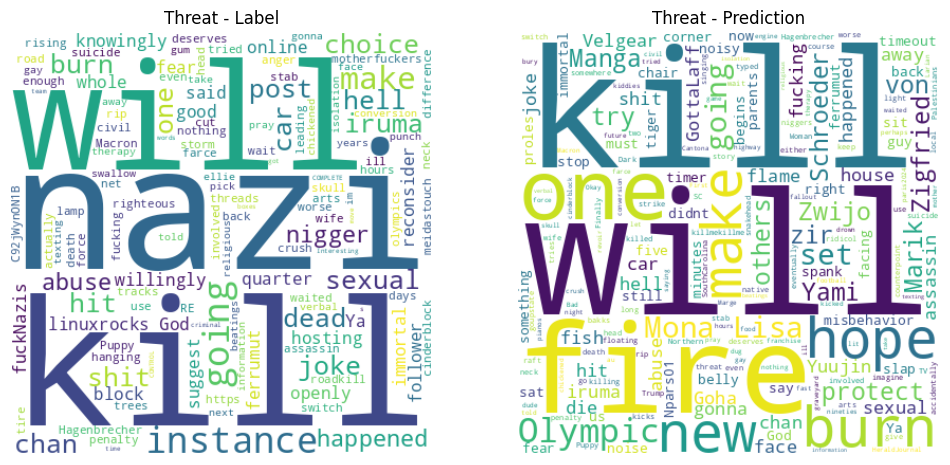

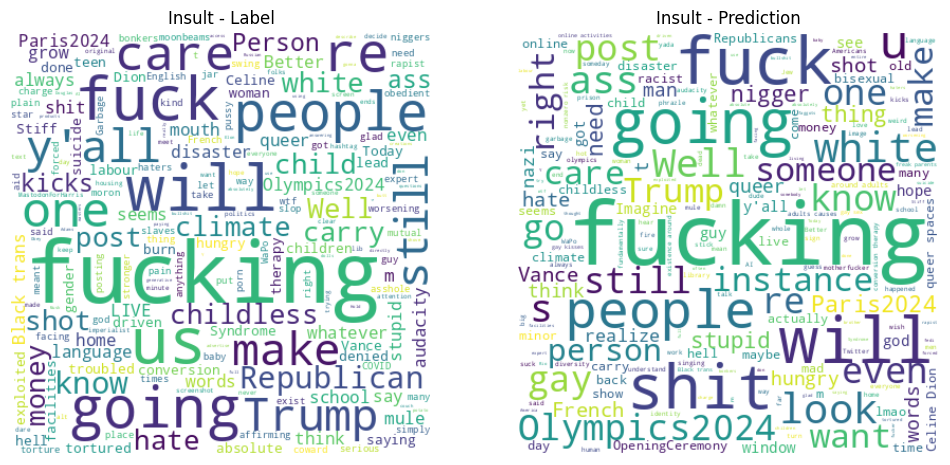

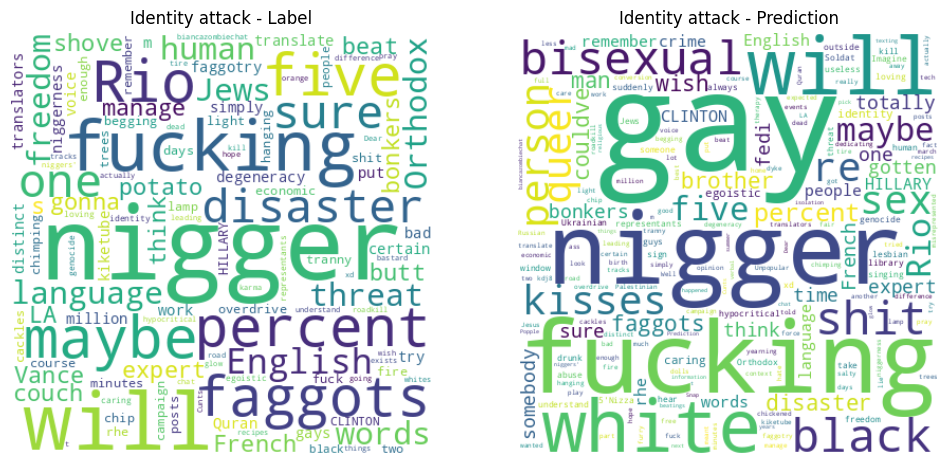

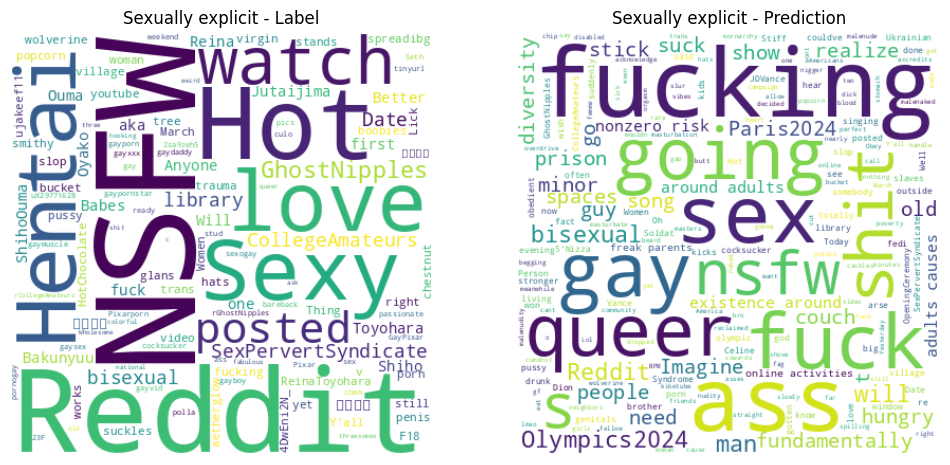

In [183]:
def generate_wordclouds(df, category):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # WordCloud for Labelled Data
    text_label = " ".join(df[df[f'{category}'] == 1]['plaintext'])
    wordcloud_label = WordCloud(width=400, height=400, background_color='white').generate(text_label)
    
    # WordCloud for Predicted Data
    text_pred = " ".join(df[df[f'{category} pred'] == 1]['plaintext'])
    wordcloud_pred = WordCloud(width=400, height=400, background_color='white').generate(text_pred)

    # Plot
    axes[0].imshow(wordcloud_label, interpolation="bilinear")
    axes[0].axis("off")
    axes[0].set_title(f"{category.capitalize()} - Label")

    axes[1].imshow(wordcloud_pred, interpolation="bilinear")
    axes[1].axis("off")
    axes[1].set_title(f"{category.capitalize()} - Prediction")

    plt.show()

# Generate word clouds for all categories
for category in categories:
    generate_wordclouds(df0, category)

